In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.io import read_image
import matplotlib.pyplot as plt

from model import CNN

In [8]:
# Label Overview
# Credit: https://www.kaggle.com/code/shivank856/gtsrb-cnn-98-test-accuracy
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Path to model and hyperparameters

In [9]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

in_channels = 3
num_classes = len(classes.keys())
learning_rate = 0.001

load = True
model_path = "models/demo-29.pt"

In [14]:
model = CNN(num_classes=num_classes, in_channels=in_channels).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
if load:
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

### Cell specifying image path

In [23]:
img = read_image("resized_data/test/test-131.png")
img = img[None, :]
img = img.to(device).float()
labels = model(img)

classes[labels.argmax().item()] 

'Speed limit (80km/h)'

### Showing the result

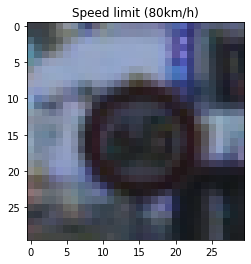

In [24]:
img = torch.permute(img[0].int().cpu().squeeze(), (1, 2, 0))
plt.imshow(img)
plt.title(classes[labels.argmax().item()])
plt.show()